In [1]:
import math
import pandas as pd
import sklearn.metrics
import seaborn as sns

   danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.803  0.6240    7    -6.764     0       0.0477         0.451   
1         0.762  0.7030   10    -7.951     0       0.3060         0.206   
2         0.261  0.0149    1   -27.528     1       0.0419         0.992   
3         0.722  0.7360    3    -6.994     0       0.0585         0.431   
4         0.787  0.5720    1    -7.516     1       0.2220         0.145   

   instrumentalness  liveness  valence    tempo  duration_ms  time_signature  \
0          0.000734    0.1000   0.6280   95.968       304524               4   
1          0.000000    0.0912   0.5190  151.329       247178               4   
2          0.897000    0.1020   0.0382   75.296       286987               4   
3          0.000001    0.1230   0.5820   89.860       208920               4   
4          0.000000    0.0753   0.6470  155.117       179413               4   

   liked  
0      0  
1      1  
2      0  
3      1  
4      1  


<Axes: >

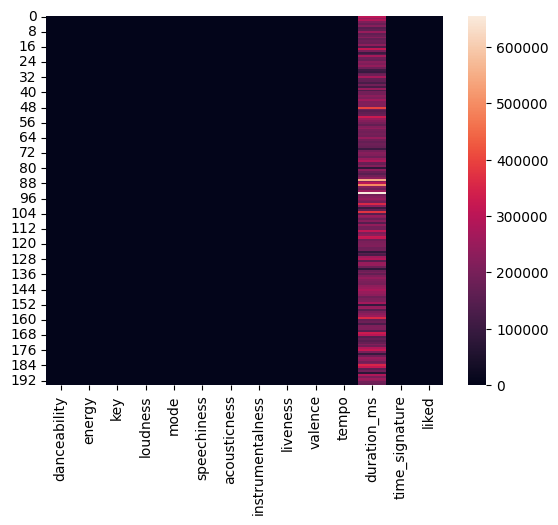

In [2]:
df = pd.read_csv("C:\\Users\\91885\\Downloads\\archive (1)\\spotify_recommendation.csv")
print(df.head())
sns.heatmap(df)

In [3]:
print(df.isnull().sum())

danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
liked               0
dtype: int64


In [5]:
X=df.drop('liked',axis=1)
# print(X)
Y=df['liked']
# print(Y)

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=43)

In [9]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scalar_train=scaler.fit_transform(X_train)
# print(X_scalar_train)
X_scalar_test=scaler.transform(X_test)
# print(X_scalar_test)

In [10]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

In [11]:
models=[LogisticRegression(max_iter=100000),SVC(),KNeighborsClassifier(),
        GaussianNB(),RandomForestClassifier(random_state=0),DecisionTreeClassifier()]
model_hyperparameter={
    'logreg_hyperparam':{
        'C':[1,5,10,20]
    },
    'SVC_hyperparm':{
        'C':[1,5,10,20],
        'kernel':['linear','poly','sigmoid','rbf']
    },
    'Kneighbours_hyperparam':{
        'n_neighbors':[5,7,9]
    },
    'Gaussian_hyperparam':{
        'var_smoothing':[1e-9,1e-11,1e-7]
    },
    'Randomforest_hyperparam':{
        'n_estimators':[100,150,200],
        'criterion':['gini','entropy','log_loss']
    },
    'Decisiontree_hyperparam':{
        'criterion':['gini','entropy','log_loss']
    }
}
print(type(model_hyperparameter))
print(model_hyperparameter.keys())
print(model_hyperparameter.values())

<class 'dict'>
dict_keys(['logreg_hyperparam', 'SVC_hyperparm', 'Kneighbours_hyperparam', 'Gaussian_hyperparam', 'Randomforest_hyperparam', 'Decisiontree_hyperparam'])
dict_values([{'C': [1, 5, 10, 20]}, {'C': [1, 5, 10, 20], 'kernel': ['linear', 'poly', 'sigmoid', 'rbf']}, {'n_neighbors': [5, 7, 9]}, {'var_smoothing': [1e-09, 1e-11, 1e-07]}, {'n_estimators': [100, 150, 200], 'criterion': ['gini', 'entropy', 'log_loss']}, {'criterion': ['gini', 'entropy', 'log_loss']}])


In [12]:
model_keys=list(model_hyperparameter.keys())
print(model_keys)
# print(model_hyperparameter[model_keys[2]])
def model_selection(models,model_hyperparameter):
    result=[]
    i=0
    for model in models:
        key = model_keys[i]
        params = model_hyperparameter[key]
        i=i+1
        print(model)
        print(params)
         
        cv_score=cross_val_score(model,X_scalar_train,Y_train,cv=5)
        mean_accuracy=sum(cv_score)/len(cv_score)
        mean_accuracy=mean_accuracy*100
        mean_accuracy=round(mean_accuracy,2)
        print(f"accuracy:{mean_accuracy}")
        print('------------------------------------------------------')
        
        classifier=GridSearchCV(model,params,cv=5)
        classifier.fit(X_scalar_train,Y_train)
        result.append({
            'model_used':model,
            'highest_score':classifier.best_score_,
            'best_hyperparam':classifier.best_params_
        })
    print(result)
    resultframe=pd.DataFrame(result,columns=['model_used','highest_score','best_hyperparam'])
    return resultframe
model_selection(models,model_hyperparameter)

['logreg_hyperparam', 'SVC_hyperparm', 'Kneighbours_hyperparam', 'Gaussian_hyperparam', 'Randomforest_hyperparam', 'Decisiontree_hyperparam']
LogisticRegression(max_iter=100000)
{'C': [1, 5, 10, 20]}
accuracy:88.94
------------------------------------------------------
SVC()
{'C': [1, 5, 10, 20], 'kernel': ['linear', 'poly', 'sigmoid', 'rbf']}
accuracy:91.9
------------------------------------------------------
KNeighborsClassifier()
{'n_neighbors': [5, 7, 9]}
accuracy:88.25
------------------------------------------------------
GaussianNB()
{'var_smoothing': [1e-09, 1e-11, 1e-07]}
accuracy:80.9
------------------------------------------------------
RandomForestClassifier(random_state=0)
{'n_estimators': [100, 150, 200], 'criterion': ['gini', 'entropy', 'log_loss']}
accuracy:90.42
------------------------------------------------------
DecisionTreeClassifier()
{'criterion': ['gini', 'entropy', 'log_loss']}
accuracy:81.64
------------------------------------------------------
[{'model_us

,model_used,highest_score,best_hyperparam
0,LogisticRegression(max_iter=100000),0.889418,{'C': 1}
1,SVC(),0.919048,"{'C': 1, 'kernel': 'rbf'}"
2,KNeighborsClassifier(),0.882540,{'n_neighbors': 5}
3,GaussianNB(),0.808995,{'var_smoothing': 1e-09}
4,RandomForestClassifier(random_state=0),0.918783,"{'criterion': 'entropy', 'n_estimators': 150}"
5,DecisionTreeClassifier(),0.823810,{'criterion': 'gini'}


In [13]:
model = RandomForestClassifier(criterion='entropy',n_estimators=150)
model.fit(X_scalar_train,Y_train)
ycap=model.predict(X_scalar_test)
print(ycap)

# ##step-5 Accuracy
from sklearn.metrics import accuracy_score
import numpy as np
accscore = accuracy_score(np.round(ycap),Y_test)
print(accscore*100)

[1 1 0 1 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 1 0 1 0 1 0 1 1 1 1 1 1 1
 0 0 1 1 1 0 0 0 0 0 0 1 1 1 1 1 0 0 0 1 0 1]
93.22033898305084
